In [5]:
import numpy as np
from scipy.optimize import fsolve, minimize_scalar
from scipy.constants import k, e

# Constants
T = 300  # Temperature, K
q = e  # Elementary charge, C
V_t = k * T / q  # Thermal voltage, V

# Given parameters (replace the following values according to the specific situation)
Jph_mA_cm2 = 26.3  # Photocurrent mA/cm²
Jph = Jph_mA_cm2 / 1000  # Photocurrent, converted to A/cm²
J0_mA_cm2 = 1.165176e-13  # Saturation current mA/cm²
J0 = J0_mA_cm2 / 1000  # Saturation current, A/cm²
Rs = 0.8156  # Series resistance, Ω·cm²
Rsh = 2853  # Shunt resistance, Ω·cm²
n = 1.349362  # Ideality factor

# 1. Calculate short-circuit current Jsc
def func_Jsc(Jsc):
    """Equation under short-circuit condition: V = 0"""
    return Jph - J0 * (np.exp((Jsc * Rs) / (n * V_t)) - 1) - (Jsc * Rs) / Rsh - Jsc

Jsc_initial_guess = Jph
Jsc = fsolve(func_Jsc, Jsc_initial_guess)[0]  # A/cm²
Jsc_mA_cm2 = Jsc * 1000  # mA/cm²

# 2. Calculate open-circuit voltage Voc
def func_Voc(Voc):
    """Equation under open-circuit condition: J = 0"""
    return Jph - J0 * (np.exp(Voc / (n * V_t)) - 1) - Voc / Rsh

Voc_initial_guess = n * V_t * np.log(Jph / J0)
Voc = fsolve(func_Voc, Voc_initial_guess)[0]  # V

# 3. Calculate fill factor FF
def J(V):
    """Solve for the corresponding J given V"""
    def func(J):
        return Jph - J0 * (np.exp((V + J * Rs) / (n * V_t)) - 1) - (V + J * Rs) / Rsh - J
    J_initial_guess = Jph - J0 * (np.exp(V / (n * V_t)) - 1) - V / Rsh
    return fsolve(func, J_initial_guess)[0]

def P(V):
    """Power function: P(V) = J(V) * V"""
    return J(V) * V

# Find the maximum power point
result = minimize_scalar(lambda V: -P(V), bounds=(0, Voc), method='bounded')
Vm = result.x
Jm = J(Vm)
P_max = Jm * Vm  # W/cm²

FF = P_max / (Jsc * Voc)

# 4. Calculate power conversion efficiency PCE
P_in = 0.1  # Incident light power density, W/cm²
PCE = (Jsc * Voc * FF) / P_in

# Output results
print(f"Short-circuit current Jsc: {Jsc_mA_cm2:.6f} mA/cm²")
print(f"Open-circuit voltage Voc: {Voc:.6f} V")
print(f"Fill Factor FF: {FF:.6%}")
print(f"Power Conversion Efficiency PCE: {PCE:.6%}")
print(f"Vm: {Vm:.6f} V")
print(f"Jm: {Jm*1000:.6f} mA/cm²")

Short-circuit current Jsc: 26.292484 mA/cm²
Open-circuit voltage Voc: 1.152377 V
Fill Factor FF: 83.856208%
Power Conversion Efficiency PCE: 25.407473%
Vm: 1.013494 V
Jm: 25.069178 mA/cm²


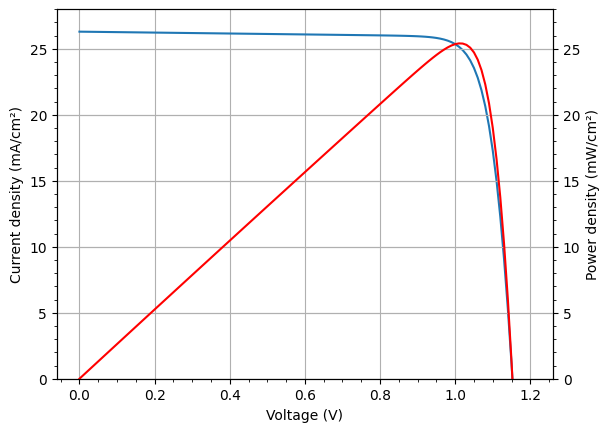

In [6]:
import matplotlib.pyplot as plt
v = np.linspace(0, 1.2, 121)
j = np.array([J(x) for x in v])
p = np.array([P(x) for x in v])
fig, ax = plt.subplots()
ax.plot(v, j*1000)
ax.set_xlabel("Voltage (V)")
ax.set_ylabel("Current density (mA/cm²)")
ax.set_ylim(0, 28)
ax.minorticks_on()
ax.grid(True)
ax2 = ax.twinx()
ax2.plot(v, p*1000, 'r')
ax2.set_ylim(0, 28)
ax2.set_ylabel("Power density (mW/cm²)")
ax2.minorticks_on()
ax2.grid(True)
plt.show()
